In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 1

### c)

In [2]:
def f(x):
    return (x[1] - np.cos(x[0]))**2 + (x[1]-x[0])**2

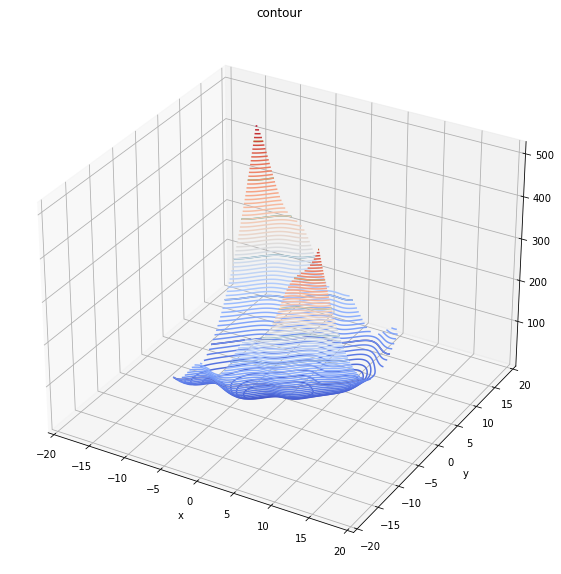

In [3]:
%matplotlib inline

par =10
x = np.linspace(-par, par, 300)
y = np.linspace(-par, par, 300)

X, Y = np.meshgrid(x, y)
Z = f((X, Y))

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z)
ax.contour3D(X, Y, Z, 80, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('z')
ax.set_title('contour')
parlim = 20
plt.xlim([-parlim, parlim])
plt.ylim([-parlim, parlim])
plt.show()

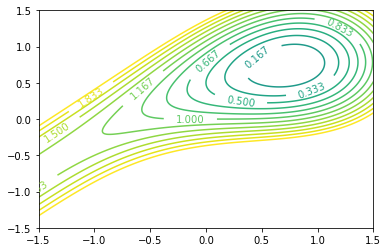

In [5]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

## 2

### a) Steepest Descent

In [6]:
def gradf(x):
    df_dx0 = 2*(x[1]*np.sin(x[0]) - x[1] + x[0]) - np.sin(2*x[0])
    df_dx1 = 2*(2*x[1] - x[0] - np.cos(x[0]))
    return np.array([df_dx0, df_dx1])

In [7]:
def norm_gradf(x):
    return np.linalg.norm(gradf(x))

In [8]:
def p(x):
    return -gradf(x)/norm_gradf(x)

In [9]:
def alpha_0(x_k, x_k_prev):
    al_0 =  -(2*(f(x_k) - f(x_k_prev)))/norm_gradf(x_k)
    return min(1., 1.01*al_0)

In [50]:
def line_search_sd(x_k, x_k_prev, rho=.2, c_1=.1e-4, c_2=.1):
    if x_k_prev is not None:
        alpha = alpha_0(x_k, x_k_prev)
    else:
        alpha = 1
    p_k = p(x_k)
    while f(x_k + alpha*p_k) > f(x_k) + c_1*alpha*(p_k@gradf(x_k)) and\
    np.abs(p_k@gradf(x_k + alpha*p_k)) > c_2*np.abs(p_k@gradf(x_k)):
        alpha = rho*alpha
        if alpha < 1e-10:
            break
    return alpha    

In [51]:
def steepest_descent(x_0, iter_num=50):
    k = 0
    x_k = x_0
    x_k_prev = None
    x_pt = [x_0[0]]
    y_pt = [x_0[1]]
    while k < iter_num:
        al_k = line_search_sd(x_k, x_k_prev)
        x_k_next = x_k + al_k*p(x_k)
        x_k, x_k_prev = x_k_next, x_k
        k += 1
        x_pt.append(x_k[0])
        y_pt.append(x_k[1])
        print(f'Iteration {k}:', x_k, f(x_k))
    return x_k, x_pt, y_pt, k

In [52]:
# should converge to x* = (0.739085, 0.739085)
iter_num = 50
x_01 = np.array([1, -1])
x_k1, x_pt1, y_pt1, k1 = steepest_descent(x_01, iter_num)
print(x_k1)

Iteration 1: [ 0.80499752 -0.01919725] 1.1866829459727457
Iteration 2: [0.60677187 0.96095916] 0.1448994370439087
Iteration 3: [0.70401115 0.78618925] 0.007326232223636739
Iteration 4: [0.7252941  0.75232133] 0.0007466070748169356
Iteration 5: [0.74608674 0.72582612] 0.0004831612297718415
Iteration 6: [0.74237673 0.73320422] 9.752803228853604e-05
Iteration 7: [0.73988646 0.73797481] 3.979659255716813e-06
Iteration 8: [0.73920683 0.73907936] 2.2055553046728706e-08
Iteration 9: [0.73904157 0.73912673] 7.4028137889026e-09
Iteration 10: [0.73905635 0.73910802] 2.681779103773577e-09
Iteration 11: [0.7390993  0.73905997] 1.7904730643641775e-09
Iteration 12: [0.73909256 0.73907282] 4.4289504217958547e-10
Iteration 13: [0.73908832 0.73908057] 6.595637504226729e-11
Iteration 14: [0.73908501 0.73908606] 1.8188609982821797e-12
Iteration 15: [0.73908534 0.73908478] 3.606782152153297e-13
Iteration 16: [0.73908518 0.73908507] 1.2276725366516558e-14
Iteration 17: [0.73908513 0.73908515] 3.40419856314

In [53]:
x_02 = np.array([-1, 0])
x_k2, x_pt2, y_pt2, k2 = steepest_descent(x_02, iter_num)
print(x_k2)

Iteration 1: [-0.84708057 -0.1289017 ] 1.1415810847347432
Iteration 2: [0.0174341  0.37370589] 0.5189835714203687
Iteration 3: [0.82321122 0.96592478] 0.10219460188631754
Iteration 4: [0.79323414 0.774257  ] 0.0056472757593997915
Iteration 5: [0.76137293 0.75007306] 0.0008132666730029361
Iteration 6: [0.73491631 0.73666318] 3.033851982530261e-05
Iteration 7: [0.73910451 0.73943709] 2.438485132245124e-07
Iteration 8: [0.73914717 0.73909382] 5.394582357057217e-09
Iteration 9: [0.73903701 0.73909744] 4.055525971288732e-09
Iteration 10: [0.73905111 0.73908975] 1.8282504005729163e-09
Iteration 11: [0.73908918 0.73907456] 2.7538638308900717e-10
Iteration 12: [0.73908423 0.73908646] 5.498659676961527e-12
Iteration 13: [0.73908585 0.73908373] 5.363314519338048e-12
Iteration 14: [0.73908583 0.73908376] 5.093401792071018e-12
Iteration 15: [0.73908579 0.73908384] 4.5627704894650235e-12
Iteration 16: [0.73908572 0.73908399] 3.5538527330958366e-12
Iteration 17: [0.73908556 0.73908432] 1.80805717714

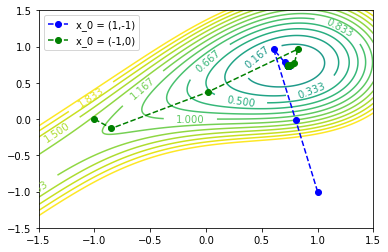

In [54]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.plot(x_pt1, y_pt1, '--bo')
plt.plot(x_pt2, y_pt2, '--go')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

### b) Error and convergence analysis of Steepest Descent

In [2]:
def err(x_k, x_star):
    return np.linalg.norm(x_k - x_star)

In [56]:
x_star = np.array((0.739085, 0.739085))
errors1 = []
for k, x_k in enumerate(zip(x_pt1, y_pt1)):
    err_k = err(x_k, x_star)
    errors1.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [ 1 -1] Error: 1.7585486272634032
k = 1, x_k: [ 0.805  -0.0192] Error: 0.7611415324748941
k = 2, x_k: [0.6068 0.961 ] Error: 0.25833100364909645
k = 3, x_k: [0.704  0.7862] Error: 0.058728061212192297
k = 4, x_k: [0.7253 0.7523] Error: 0.019115159592018066
k = 5, x_k: [0.7461 0.7258] Error: 0.014994077776239269
k = 6, x_k: [0.7424 0.7332] Error: 0.006739367139778296
k = 7, x_k: [0.7399 0.738 ] Error: 0.0013692569431344053
k = 8, x_k: [0.7392 0.7391] Error: 0.00012195885889145378
k = 9, x_k: [0.739  0.7391] Error: 6.0230578862836e-05
k = 10, x_k: [0.7391 0.7391] Error: 3.675152300587595e-05
k = 11, x_k: [0.7391 0.7391] Error: 2.882398998333283e-05
k = 12, x_k: [0.7391 0.7391] Error: 1.4332201770599412e-05
k = 13, x_k: [0.7391 0.7391] Error: 5.53807079226684e-06
k = 14, x_k: [0.7391 0.7391] Error: 1.0618340875899722e-06
k = 15, x_k: [0.7391 0.7391] Error: 4.0358070129006455e-07
k = 16, x_k: [0.7391 0.7391] Error: 1.9434756971691517e-07
k = 17, x_k: [0.7391 0.7391] Error: 1.97

In [57]:
errors2 = []
for k, x_k in enumerate(zip(x_pt2, y_pt2)):
    err_k = err(x_k, x_star)
    errors2.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [-1  0] Error: 1.8896198756495974
k = 1, x_k: [-0.8471 -0.1289] Error: 1.8081266920874448
k = 2, x_k: [0.0174 0.3737] Error: 0.8088769514009366
k = 3, x_k: [0.8232 0.9659] Error: 0.2419369939308457
k = 4, x_k: [0.7932 0.7743] Error: 0.06456933931482321
k = 5, x_k: [0.7614 0.7501] Error: 0.024849333518262205
k = 6, x_k: [0.7349 0.7367] Error: 0.004821119179768423
k = 7, x_k: [0.7391 0.7394] Error: 0.0003526347090877256
k = 8, x_k: [0.7391 0.7391] Error: 6.279574324667282e-05
k = 9, x_k: [0.739  0.7391] Error: 4.957271308842817e-05
k = 10, x_k: [0.7391 0.7391] Error: 3.422261370719626e-05
k = 11, x_k: [0.7391 0.7391] Error: 1.1247051227401963e-05
k = 12, x_k: [0.7391 0.7391] Error: 1.6522522189920502e-06
k = 13, x_k: [0.7391 0.7391] Error: 1.5309127211673357e-06
k = 14, x_k: [0.7391 0.7391] Error: 1.4910248848777909e-06
k = 15, x_k: [0.7391 0.7391] Error: 1.4094573252041958e-06
k = 16, x_k: [0.7391 0.7391] Error: 1.2403471595751412e-06
k = 17, x_k: [0.7391 0.7391] Error: 8.78

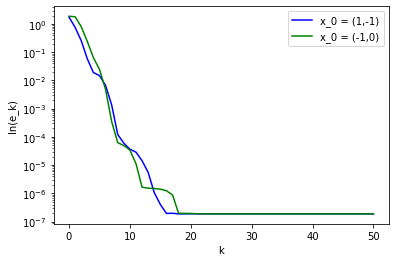

In [58]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(iter_num+1), errors1, 'b')
plt.plot(np.arange(iter_num+1), errors2, 'g')
ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

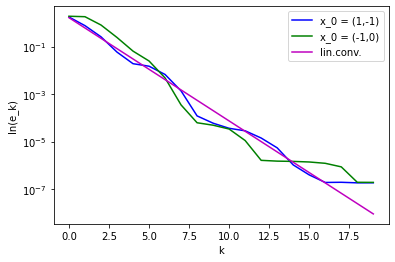

In [63]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(20), errors1[:20], 'b')
plt.plot(np.arange(20), errors2[:20], 'g')
plt.plot(np.arange(20), np.exp(np.arange(20, dtype=np.float32) - .5)**(-1), 'm')

ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)', 'lin.conv.'])
plt.show()

In [60]:
rates1 = []
x_k1 = list(zip(x_pt1, y_pt1))
for k in range(1,len(x_k1)-1):
    err_k_next = err(x_k1[k+1], x_star)
    err_k = err(x_k1[k], x_star)
    rate = err_k_next/(err_k**1)
    rates1.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 0.3394
k = 2, r: 0.2273
k = 3, r: 0.3255
k = 4, r: 0.7844
k = 5, r: 0.4495
k = 6, r: 0.2032
k = 7, r: 0.0891
k = 8, r: 0.4939
k = 9, r: 0.6102
k = 10, r: 0.7843
k = 11, r: 0.4972
k = 12, r: 0.3864
k = 13, r: 0.1917
k = 14, r: 0.3801
k = 15, r: 0.4816
k = 16, r: 1.0161
k = 17, r: 0.9473
k = 18, r: 1.0064
k = 19, r: 1.0011
k = 20, r: 0.9997
k = 21, r: 0.9999
k = 22, r: 0.9999
k = 23, r: 1.0001
k = 24, r: 1.0
k = 25, r: 1.0
k = 26, r: 1.0
k = 27, r: 1.0
k = 28, r: 1.0
k = 29, r: 1.0
k = 30, r: 1.0
k = 31, r: 1.0
k = 32, r: 1.0
k = 33, r: 1.0
k = 34, r: 1.0
k = 35, r: 1.0
k = 36, r: 1.0
k = 37, r: 1.0
k = 38, r: 1.0
k = 39, r: 1.0
k = 40, r: 1.0
k = 41, r: 1.0
k = 42, r: 1.0
k = 43, r: 1.0
k = 44, r: 1.0
k = 45, r: 1.0
k = 46, r: 1.0
k = 47, r: 1.0
k = 48, r: 1.0
k = 49, r: 1.0


In [61]:
rates2 = []
x_k2 = list(zip(x_pt2, y_pt2))
for k in range(1,len(x_k2)-1):
    err_k_next = err(x_k2[k+1], x_star)
    err_k = err(x_k2[k], x_star)
    rate = err_k_next/(err_k**1)
    rates2.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 0.4474
k = 2, r: 0.2991
k = 3, r: 0.2669
k = 4, r: 0.3848
k = 5, r: 0.194
k = 6, r: 0.0731
k = 7, r: 0.1781
k = 8, r: 0.7894
k = 9, r: 0.6904
k = 10, r: 0.3286
k = 11, r: 0.1469
k = 12, r: 0.9266
k = 13, r: 0.9739
k = 14, r: 0.9453
k = 15, r: 0.88
k = 16, r: 0.7082
k = 17, r: 0.2245
k = 18, r: 0.9911
k = 19, r: 0.9928
k = 20, r: 0.9746
k = 21, r: 0.9941
k = 22, r: 1.0001
k = 23, r: 1.0013
k = 24, r: 1.0006
k = 25, r: 1.0
k = 26, r: 1.0
k = 27, r: 1.0
k = 28, r: 1.0
k = 29, r: 1.0
k = 30, r: 1.0
k = 31, r: 1.0
k = 32, r: 1.0
k = 33, r: 1.0
k = 34, r: 1.0
k = 35, r: 1.0
k = 36, r: 1.0
k = 37, r: 1.0
k = 38, r: 1.0
k = 39, r: 1.0
k = 40, r: 1.0
k = 41, r: 1.0
k = 42, r: 1.0
k = 43, r: 1.0
k = 44, r: 1.0
k = 45, r: 1.0
k = 46, r: 1.0
k = 47, r: 1.0
k = 48, r: 1.0
k = 49, r: 1.0


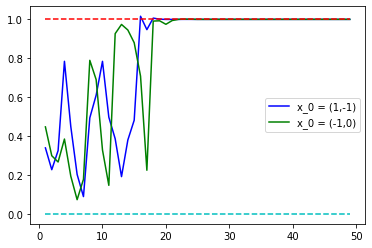

In [62]:
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(range(1,iter_num), rates1, 'b')
plt.plot(range(1,iter_num), rates2, 'g')
plt.plot(range(1,iter_num), k*[0], 'c--')
plt.plot(range(1,iter_num), k*[1], 'r--')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

In [22]:
print('Final iterration error:', err(x_k1[-1], x_star))
print('Final iterration error:', err(x_k2[-1], x_star))

Final iterration error: 1.8839905786660884e-07
Final iterration error: 1.883855024281651e-07


### c) Newton's method

In [64]:
def hessf(x):
    d2f_dx2 = 2*(x[1]*np.cos(x[0]) - np.cos(2*x[0])) + 1
    d2f_dxdy = 2*(np.sin(x[0]) - 1)
    d2f_dy2 = 4
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

In [65]:
def p_newt(x):
    inv_hessf = np.linalg.inv(hessf(x))
    return -inv_hessf@gradf(x)

In [76]:
def line_search_newt(x_k, rho=.2, c_1=.1e-4, c_2=.9):
    alpha = 1
    p_k = p_newt(x_k)
    while f(x_k + alpha*p_k) > f(x_k) + c_1*alpha*(p_k@gradf(x_k)) and\
    np.abs(p_k@gradf(x_k + alpha*p_k)) > c_2*np.abs(p_k@gradf(x_k)):
        alpha = rho*alpha
        if alpha < 1e-10:
            break
    return alpha   

In [77]:
def newton_method(x_0):
    k = 0
    x_k = x_0
    x_pt = [x_0[0]]
    y_pt = [x_0[1]]
    while k < iter_num:
        al_k = line_search_newt(x_k)
        x_k_next = x_k + al_k*p_newt(x_k)
        x_k = x_k_next
        k += 1
        x_pt.append(x_k[0])
        y_pt.append(x_k[1])
        print(f'Iteration {k}:', x_k, f(x_k))
    return x_k, x_pt, y_pt

In [78]:
x_01 = np.array([1, -1])
x_k1, x_pt1, y_pt1 = newton_method(x_01)

Iteration 1: [-0.16511059  0.67779924] 0.8057315132178673
Iteration 2: [-1.22192518 -0.20461227] 1.333532556881965
Iteration 3: [-1.29068777 -0.50673543] 1.2279763152884757
Iteration 4: [-1.33335478 -0.54894944] 1.2302083170251588
Iteration 5: [-1.36552286 -0.58078583] 1.231441885034719
Iteration 6: [-1.39049451 -0.60555349] 1.2321690126259779
Iteration 7: [-1.4103561  -0.62528461] 1.232620971783708
Iteration 8: [-1.42647946 -0.64132148] 1.2329145940227404
Iteration 9: [-1.43979747 -0.6545803 ] 1.2331125916516121
Iteration 10: [-1.45096331 -0.66570449] 1.2332504111603408
Iteration 11: [-1.46044615 -0.67515728] 1.233348995897658
Iteration 12: [-1.46859063 -0.68327961] 1.2334212041257557
Iteration 13: [-1.47565499 -0.69032732] 1.2334751988945332
Iteration 14: [-1.48183615 -0.69649575] 1.2335163171263093
Iteration 15: [-1.48728666 -0.70193637] 1.2335481399600758
Iteration 16: [-1.49212638 -0.7067683 ] 1.2335731266256622
Iteration 17: [-1.49645067 -0.71108638] 1.233593001246065
Iteration 1

In [79]:
x_02 = np.array([-1, 0])
x_k2, x_pt2, y_pt2 = newton_method(x_02)

Iteration 1: [-1.15665568 -0.37408729] 1.2153510352394696
Iteration 2: [-1.23812482 -0.45515169] 1.224134515198246
Iteration 3: [-1.29502915 -0.51112219] 1.2282372719230512
Iteration 4: [-1.33658035 -0.5521382 ] 1.2303483624864406
Iteration 5: [-1.36799757 -0.58323828] 1.2315224473669435
Iteration 6: [-1.39244345 -0.60748842] 1.2322180758546424
Iteration 7: [-1.41192502 -0.62684437] 1.2326523011411803
Iteration 8: [-1.42776613 -0.64260196] 1.2329354114744566
Iteration 9: [-1.44086955 -0.65564807] 1.2331268994572233
Iteration 10: [-1.4518689 -0.666607 ] 1.2332605337886062
Iteration 11: [-1.46122026 -0.67592915] 1.2333563391797266
Iteration 12: [-1.46925929 -0.68394659] 1.2334266488111927
Iteration 13: [-1.47623789 -0.69090894] 1.2334793140890135
Iteration 14: [-1.48234845 -0.69700706] 1.2335194807311578
Iteration 15: [-1.4877402  -0.70238914] 1.2335506090641286
Iteration 16: [-1.49253053 -0.70717184] 1.233575079953348
Iteration 17: [-1.49681294 -0.71144817] 1.23359456548138
Iteration 18

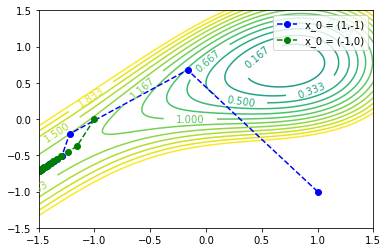

In [80]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.plot(x_pt1, y_pt1, '--bo')
plt.plot(x_pt2, y_pt2, '--go')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

In [81]:
errors1 = []
for k, x_k in enumerate(zip(x_pt1, y_pt1)):
    err_k = err(x_k, x_star)
    errors1.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [ 1 -1] Error: 1.7585486272634032
k = 1, x_k: [-0.1651  0.6778] Error: 0.906270159324844
k = 2, x_k: [-1.2219 -0.2046] Error: 2.176264109754588
k = 3, x_k: [-1.2907 -0.5067] Error: 2.3816057696308155
k = 4, x_k: [-1.3334 -0.5489] Error: 2.4400900299131276
k = 5, x_k: [-1.3655 -0.5808] Error: 2.484236953647302
k = 6, x_k: [-1.3905 -0.6056] Error: 2.5185633909004115
k = 7, x_k: [-1.4104 -0.6253] Error: 2.5458989537530017
k = 8, x_k: [-1.4265 -0.6413] Error: 2.568110492121518
k = 9, x_k: [-1.4398 -0.6546] Error: 2.586470916736626
k = 10, x_k: [-1.451  -0.6657] Error: 2.6018733843664013
k = 11, x_k: [-1.4604 -0.6752] Error: 2.61496051776637
k = 12, x_k: [-1.4686 -0.6833] Error: 2.6262050159987234
k = 13, x_k: [-1.4757 -0.6903] Error: 2.6359614578130417
k = 14, x_k: [-1.4818 -0.6965] Error: 2.6445004895153637
k = 15, x_k: [-1.4873 -0.7019] Error: 2.65203193283872
k = 16, x_k: [-1.4921 -0.7068] Error: 2.6587207437933684
k = 17, x_k: [-1.4965 -0.7111] Error: 2.6646982510946704
k =

In [82]:
errors2 = []
for k, x_k in enumerate(zip(x_pt2, y_pt2)):
    err_k = err(x_k, x_star)
    errors2.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [-1  0] Error: 1.8896198756495974
k = 1, x_k: [-1.1567 -0.3741] Error: 2.1984051645353477
k = 2, x_k: [-1.2381 -0.4552] Error: 2.309883101722905
k = 3, x_k: [-1.295  -0.5111] Error: 2.387600966995364
k = 4, x_k: [-1.3366 -0.5521] Error: 2.4445130420790058
k = 5, x_k: [-1.368  -0.5832] Error: 2.4876365904607836
k = 6, x_k: [-1.3924 -0.6075] Error: 2.5212444418965143
k = 7, x_k: [-1.4119 -0.6268] Error: 2.548059483031632
k = 8, x_k: [-1.4278 -0.6426] Error: 2.569883783388245
k = 9, x_k: [-1.4409 -0.6556] Error: 2.5879494157507112
k = 10, x_k: [-1.4519 -0.6666] Error: 2.6031229302994006
k = 11, x_k: [-1.4612 -0.6759] Error: 2.616029104268261
k = 12, x_k: [-1.4693 -0.6839] Error: 2.6271283549033835
k = 13, x_k: [-1.4762 -0.6909] Error: 2.6367666118151676
k = 14, x_k: [-1.4823 -0.697 ] Error: 2.6452083038627863
k = 15, x_k: [-1.4877 -0.7024] Error: 2.652658700031559
k = 16, x_k: [-1.4925 -0.7072] Error: 2.659279366558844
k = 17, x_k: [-1.4968 -0.7114] Error: 2.6651990699302526
k

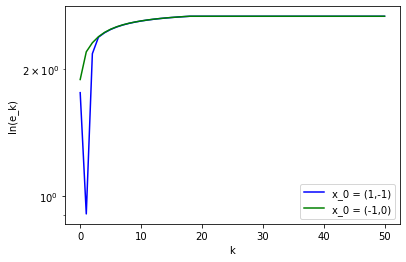

In [83]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(iter_num+1), errors1, 'b')
plt.plot(np.arange(iter_num+1), errors2, 'g')
ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

In [84]:
rates1 = []
x_k1 = list(zip(x_pt1, y_pt1))
for k in range(1,len(x_k1)-1):
    err_k_next = err(x_k1[k+1], x_star)
    err_k = err(x_k1[k], x_star)
    rate = err_k_next/(err_k**1)
    rates1.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 2.4013
k = 2, r: 1.0944
k = 3, r: 1.0246
k = 4, r: 1.0181
k = 5, r: 1.0138
k = 6, r: 1.0109
k = 7, r: 1.0087
k = 8, r: 1.0071
k = 9, r: 1.006
k = 10, r: 1.005
k = 11, r: 1.0043
k = 12, r: 1.0037
k = 13, r: 1.0032
k = 14, r: 1.0028
k = 15, r: 1.0025
k = 16, r: 1.0022
k = 17, r: 1.002
k = 18, r: 1.0
k = 19, r: 1.0
k = 20, r: 1.0
k = 21, r: 1.0
k = 22, r: 1.0
k = 23, r: 1.0
k = 24, r: 1.0
k = 25, r: 1.0
k = 26, r: 1.0
k = 27, r: 1.0
k = 28, r: 1.0
k = 29, r: 1.0
k = 30, r: 1.0
k = 31, r: 1.0
k = 32, r: 1.0
k = 33, r: 1.0
k = 34, r: 1.0
k = 35, r: 1.0
k = 36, r: 1.0
k = 37, r: 1.0
k = 38, r: 1.0
k = 39, r: 1.0
k = 40, r: 1.0
k = 41, r: 1.0
k = 42, r: 1.0
k = 43, r: 1.0
k = 44, r: 1.0
k = 45, r: 1.0
k = 46, r: 1.0
k = 47, r: 1.0
k = 48, r: 1.0
k = 49, r: 1.0


In [85]:
rates2 = []
x_k2 = list(zip(x_pt2, y_pt2))
for k in range(1,len(x_k2)-1):
    err_k_next = err(x_k2[k+1], x_star)
    err_k = err(x_k2[k], x_star)
    rate = err_k_next/(err_k**1)
    rates2.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 1.0507
k = 2, r: 1.0336
k = 3, r: 1.0238
k = 4, r: 1.0176
k = 5, r: 1.0135
k = 6, r: 1.0106
k = 7, r: 1.0086
k = 8, r: 1.007
k = 9, r: 1.0059
k = 10, r: 1.005
k = 11, r: 1.0042
k = 12, r: 1.0037
k = 13, r: 1.0032
k = 14, r: 1.0028
k = 15, r: 1.0025
k = 16, r: 1.0022
k = 17, r: 1.002
k = 18, r: 1.0
k = 19, r: 1.0
k = 20, r: 1.0
k = 21, r: 1.0
k = 22, r: 1.0
k = 23, r: 1.0
k = 24, r: 1.0
k = 25, r: 1.0
k = 26, r: 1.0
k = 27, r: 1.0
k = 28, r: 1.0
k = 29, r: 1.0
k = 30, r: 1.0
k = 31, r: 1.0
k = 32, r: 1.0
k = 33, r: 1.0
k = 34, r: 1.0
k = 35, r: 1.0
k = 36, r: 1.0
k = 37, r: 1.0
k = 38, r: 1.0
k = 39, r: 1.0
k = 40, r: 1.0
k = 41, r: 1.0
k = 42, r: 1.0
k = 43, r: 1.0
k = 44, r: 1.0
k = 45, r: 1.0
k = 46, r: 1.0
k = 47, r: 1.0
k = 48, r: 1.0
k = 49, r: 1.0


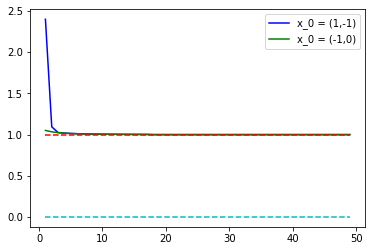

In [86]:
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(range(1,iter_num), rates1, 'b')
plt.plot(range(1,iter_num), rates2, 'g')
plt.plot(range(1,iter_num), k*[0], 'c--')
plt.plot(range(1,iter_num), k*[1], 'r--')
plt.legend(['x_0 = (1,-1)','x_0 = (-1,0)'])
plt.show()

In [87]:
for x_k in x_k1:
    hess = hessf(x_k)
    delta_1 = hess[0,0]
    delta_2 = np.linalg.det(hess)
    print(hess)
    print(delta_1, delta_2)

[[ 0.75168906 -0.31705803]
 [-0.31705803  4.        ]]
0.7516890613580053 2.9062304508009085
[[ 0.44522128 -2.32872283]
 [-2.32872283  4.        ]]
0.4452212813034879 -3.6420648801978053
[[ 2.39270123 -3.87951839]
 [-3.87951839  4.        ]]
2.392701231512039 -5.479858037878605
[[ 2.41409539 -3.92205086]
 [-3.92205086  4.        ]]
2.414095388567227 -5.726101422248299
[[ 2.52044817 -3.94388589]
 [-3.94388589  4.        ]]
2.520448173702328 -5.472443229933529
[[ 2.5970365  -3.95801056]
 [-3.95801056  4.        ]]
2.597036500547407 -5.277701564694633
[[ 2.65418442 -3.96757923]
 [-3.96757923  4.        ]]
2.654184424232686 -5.124947221496632
[[ 2.69813425 -3.9743141 ]
 [-3.9743141   4.        ]]
2.698134251866549 -5.002635585701517
[[ 2.73280221 -3.97920877]
 [-3.97920877  4.        ]]
2.7328022116642403 -4.902893558832471
[[ 2.7607405  -3.98286383]
 [-3.98286383  4.        ]]
2.7607405019715925 -4.820242255980361
[[ 2.78366943 -3.98565722]
 [-3.98565722  4.        ]]
2.783669431541084 -4

In [88]:
for x_k in x_k2:
    hess = hessf(x_k)
    delta_1 = hess[0,0]
    delta_2 = np.linalg.det(hess)
    print(hess)
    print(delta_1, delta_2)

[[ 1.83229367 -3.68294197]
 [-3.68294197  4.        ]]
1.8322936730942847 -6.234886859180319
[[ 2.05121812 -3.83092493]
 [-3.83092493  4.        ]]
2.0512181191124284 -6.471113334580159
[[ 2.27613308 -3.89034657]
 [-3.89034657  4.        ]]
2.2761330812237066 -6.03026411089892
[[ 2.42510104 -3.92443318]
 [-3.92443318  4.        ]]
2.4251010385477816 -5.7007716227386425
[[ 2.52827373 -3.94539319]
 [-3.94539319  4.        ]]
2.5282737319692474 -5.4530325337686705
[[ 2.60279179 -3.95901343]
 [-3.95901343  4.        ]]
2.602791791638355 -5.262620141369867
[[ 2.65855685 -3.96827449]
 [-3.96827449  4.        ]]
2.6585568470487106 -5.11297500244156
[[ 2.70154783 -3.97481295]
 [-3.97481295  4.        ]]
2.7015478298874527 -4.992946674838742
[[ 2.7355291  -3.97957721]
 [-3.97957721  4.        ]]
2.7355291025724675 -4.894918399057723
[[ 2.76296169 -3.98314277]
 [-3.98314277  4.        ]]
2.762961686071705 -4.813579552254301
[[ 2.78550908 -3.98587293]
 [-3.98587293  4.        ]]
2.785509077926233

In [89]:
x_03 = np.array([1, 0])
x_k3, x_pt3, y_pt3 = newton_method(x_03)

Iteration 1: [0.531575   0.73302168] 0.05721869586286449
Iteration 2: [0.62656848 0.74919686] 0.018740143009138243
Iteration 3: [0.83183165 0.7607581 ] 0.012661411475399908
Iteration 4: [0.70330774 0.73591564] 0.0017810571314303258
Iteration 5: [0.76184845 0.74334735] 0.0007337767094758944
Iteration 6: [0.72752793 0.73738968] 0.0001861976013029942
Iteration 7: [0.74579802 0.74023431] 6.330458912042447e-05
Iteration 8: [0.73545464 0.73850993] 1.843024290310489e-05
Iteration 9: [0.74112981 0.739424  ] 5.860361179105304e-06
Iteration 10: [0.73795888 0.73890296] 1.775570266106415e-06
Iteration 11: [0.73971325 0.73918813] 5.526957884002364e-07
Iteration 12: [0.73873722 0.73902851] 1.694905096598024e-07
Iteration 13: [0.73927857 0.73911675] 5.24102072852049e-08
Iteration 14: [0.73897781 0.73906763] 1.613183363071184e-08
Iteration 15: [0.73914475 0.73909487] 4.978108314534802e-09
Iteration 16: [0.73905204 0.73907973] 1.5340069617441536e-09
Iteration 17: [0.73910351 0.73908813] 4.7307862808584

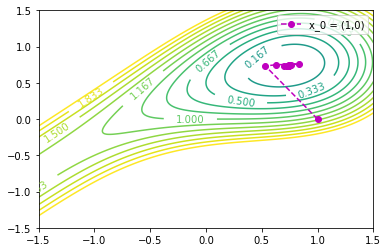

In [90]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.plot(x_pt3, y_pt3, '--mo')
plt.legend(['x_0 = (1,0)'])
plt.show()

## 3

### a) Code for PR Gradient Conjugate Method

In [91]:
def f(x):
    return x[0]**2 + 4*x[1]**4 + 2*x[1]**2

In [92]:
def gradf(x):
    df_dx = 2*x[0]
    df_dy = 4*x[1]*(4*x[1]**2 + 1)
    return np.array([df_dx, df_dy])

In [93]:
def line_search_pr(x_k, p_k, rho=.2, c_1=.1e-4, c_2=.1):
    alpha = 1.
    while f(x_k + alpha*p_k) > f(x_k) + c_1*alpha*(p_k@gradf(x_k)) and\
    np.abs(p_k@gradf(x_k + alpha*p_k)) > c_2*np.abs(p_k@gradf(x_k)):
        alpha = rho*alpha
        if alpha < 1e-10:
            break
    return alpha    

In [94]:
def polak_ribiere(x_0):
    x_k = x_0
    f_k = f(x_0)
    gradf_k = gradf(x_0)
    p_k = -gradf_k
    beta_k = 0
    k = 0
    
    x_pt = [x_0[0]]
    y_pt = [x_0[1]] 
    
    while np.linalg.norm(gradf_k) >= 1e-4:
        alpha_k = line_search_pr(x_k, p_k)
        x_k_next = x_k + alpha_k*p_k
        gradf_k_next = gradf(x_k_next)
        beta_k_next = (gradf_k_next@(gradf_k_next - gradf_k))/(np.linalg.norm(gradf_k)**2)
        p_k_next = -gradf_k_next + beta_k_next*p_k
        
        x_k, gradf_k, beta_k, p_k = x_k_next, gradf_k_next, beta_k_next, p_k_next
        
        x_pt.append(x_k[0])
        y_pt.append(x_k[1])
        
        k += 1
        
        print(f'Iteraton: {k}, x_k: {x_k}, f(x_k): {f(x_k)}')
    
    return x_k, x_pt, y_pt, k

### b) Numerical experiments for PR

In [95]:
x_01 = np.array([-1., 2.])
x_k1, x_pt1, y_pt1, k1 = polak_ribiere(x_01)

Iteraton: 1, x_k: [-0.984  0.912], f(x_k): 5.398936326143995
Iteraton: 2, x_k: [ 0.77885008 -0.92261398], f(x_k): 5.207319098446955
Iteraton: 3, x_k: [ 0.8632214  -0.42502589], f(x_k): 1.2369785731067102
Iteraton: 4, x_k: [ 0.45665297 -0.20071431], f(x_k): 0.29559632116319906
Iteraton: 5, x_k: [ 0.3655871  -0.06480248], f(x_k): 0.14212319047370586
Iteraton: 6, x_k: [-0.2828703   0.07531029], f(x_k): 0.09148755772337085
Iteraton: 7, x_k: [-0.2828703   0.07531029], f(x_k): 0.09148755773000888
Iteraton: 8, x_k: [-0.16972218  0.01369523], f(x_k): 0.029180878576458017
Iteraton: 9, x_k: [0.04607067 0.02620791], f(x_k): 0.0034981019602370027
Iteraton: 10, x_k: [0.04408921 0.00613764], f(x_k): 0.0020192054810152437
Iteraton: 11, x_k: [-0.04290904 -0.00646255], f(x_k): 0.0019247215365079968
Iteraton: 12, x_k: [-0.04290904 -0.00646255], f(x_k): 0.0019247215367395201
Iteraton: 13, x_k: [-0.02574542 -0.00129165], f(x_k): 0.0006661634363109227
Iteraton: 14, x_k: [ 0.00572108 -0.00215779], f(x_k): 4

In [96]:
x_02 = np.array([-1., -.25])
x_k2, x_pt2, y_pt2, k2 = polak_ribiere(x_02)

Iteraton: 1, x_k: [-0.6  0. ], f(x_k): 0.36
Iteraton: 2, x_k: [ 0.25483146 -0.21573034], f(x_k): 0.1666819594282582
Iteraton: 3, x_k: [ 0.38073872 -0.06851709], f(x_k): 0.15443931152265497
Iteraton: 4, x_k: [ 0.22689456 -0.01448484], f(x_k): 0.051900940118489274
Iteraton: 5, x_k: [-0.04861956 -0.01910956], f(x_k): 0.003094745716034615
Iteraton: 6, x_k: [-0.04365322 -0.00404266], f(x_k): 0.00193829095292938
Iteraton: 7, x_k: [0.04066407 0.00306055], f(x_k): 0.001672300516279625
Iteraton: 8, x_k: [0.04066407 0.00306055], f(x_k): 0.0016723005164638617
Iteraton: 9, x_k: [0.02439844 0.00061202], f(x_k): 0.0005960329777313838
Iteraton: 10, x_k: [-0.0050239   0.00108047], f(x_k): 2.7574374579537578e-05
Iteraton: 11, x_k: [-0.00236343 -0.00312382], f(x_k): 2.510263265507923e-05
Iteraton: 12, x_k: [-0.00059527 -0.00192491], f(x_k): 7.764924838976092e-06
Iteraton: 13, x_k: [-0.00076469 -0.00066129], f(x_k): 1.459353796754368e-06
Iteraton: 14, x_k: [-0.00042295 -0.00039979], f(x_k): 4.98540357564

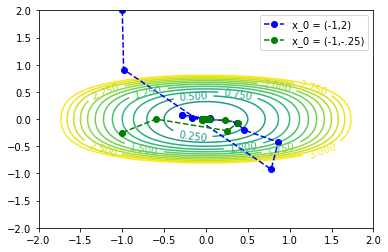

In [97]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-3, 3, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.plot(x_pt1, y_pt1, '--bo')
plt.plot(x_pt2, y_pt2, '--go')
plt.legend(['x_0 = (-1,2)','x_0 = (-1,-.25)'])
plt.show()

### d) Fixed PR

In [98]:
def polak_ribiere_fix(x_0):
    x_k = x_0
    f_k = f(x_0)
    gradf_k = gradf(x_0)
    p_k = -gradf_k
    beta_k = 0
    k = 0
    
    x_pt = [x_0[0]]
    y_pt = [x_0[1]] 
    
    while np.linalg.norm(gradf_k) >= 1e-4:
        alpha_k = line_search_pr(x_k, p_k)
        x_k_next = x_k + alpha_k*p_k
        gradf_k_next = gradf(x_k_next)
        beta_k_next = (gradf_k_next@(gradf_k_next - gradf_k))/(np.linalg.norm(gradf_k)**2)
        beta_k_next = max(beta_k_next, 0)
        p_k_next = -gradf_k_next + beta_k_next*p_k
        
        x_k, gradf_k, beta_k, p_k = x_k_next, gradf_k_next, beta_k_next, p_k_next
        
        x_pt.append(x_k[0])
        y_pt.append(x_k[1])
        
        k += 1
        
        print(f'Iteraton: {k}, x_k: {x_k}, f(x_k): {f(x_k)}')
    
    return x_k, x_pt, y_pt, k

In [99]:
x_03 = np.array([-1., 2.])
x_k3, x_pt3, y_pt3, k3 = polak_ribiere_fix(x_03)

Iteraton: 1, x_k: [-0.984  0.912], f(x_k): 5.398936326143995
Iteraton: 2, x_k: [-0.90528     0.28060766], f(x_k): 1.0018135645962902
Iteraton: 3, x_k: [-0.543168   -0.01458321], f(x_k): 0.29545699726184194
Iteraton: 4, x_k: [-0.3259008  -0.00290672], f(x_k): 0.10622822974301872
Iteraton: 5, x_k: [-0.19554048 -0.00058126], f(x_k): 0.0382367550570253
Iteraton: 6, x_k: [-1.17324288e-01 -1.16252366e-04], f(x_k): 0.013765015583932965
Iteraton: 7, x_k: [-7.03945728e-02 -2.32504682e-05], f(x_k): 0.004955396960863043
Iteraton: 8, x_k: [-4.22367437e-02 -4.65009360e-06], f(x_k): 0.0017839425599367605
Iteraton: 9, x_k: [-2.53420462e-02 -9.30018720e-07], f(x_k): 0.0006422193077382766
Iteraton: 10, x_k: [-1.52052277e-02 -1.86003744e-07], f(x_k): 0.00023119895023222126
Iteraton: 11, x_k: [-9.12313663e-03 -3.72007488e-08], f(x_k): 8.32316220614573e-05
Iteraton: 12, x_k: [-5.47388198e-03 -7.44014976e-09], f(x_k): 2.996338394123893e-05
Iteraton: 13, x_k: [-3.28432919e-03 -1.48802995e-09], f(x_k): 1.078

In [100]:
x_04 = np.array([-1., -.25])
x_k4, x_pt4, y_pt4, k4 = polak_ribiere_fix(x_04)

Iteraton: 1, x_k: [-0.6  0. ], f(x_k): 0.36
Iteraton: 2, x_k: [-0.36  0.  ], f(x_k): 0.1296
Iteraton: 3, x_k: [-0.216  0.   ], f(x_k): 0.046655999999999996
Iteraton: 4, x_k: [-0.1296  0.    ], f(x_k): 0.016796159999999997
Iteraton: 5, x_k: [-0.07776  0.     ], f(x_k): 0.006046617599999999
Iteraton: 6, x_k: [-0.046656  0.      ], f(x_k): 0.0021767823359999995
Iteraton: 7, x_k: [-0.0279936  0.       ], f(x_k): 0.0007836416409599999
Iteraton: 8, x_k: [-0.01679616  0.        ], f(x_k): 0.0002821109907455999
Iteraton: 9, x_k: [-0.0100777  0.       ], f(x_k): 0.00010155995666841595
Iteraton: 10, x_k: [-0.00604662  0.        ], f(x_k): 3.656158440062974e-05
Iteraton: 11, x_k: [-0.00362797  0.        ], f(x_k): 1.3162170384226707e-05
Iteraton: 12, x_k: [-0.00217678  0.        ], f(x_k): 4.7383813383216126e-06
Iteraton: 13, x_k: [-0.00130607  0.        ], f(x_k): 1.7058172817957804e-06
Iteraton: 14, x_k: [-0.00078364  0.        ], f(x_k): 6.140942214464809e-07
Iteraton: 15, x_k: [-0.00047018  0

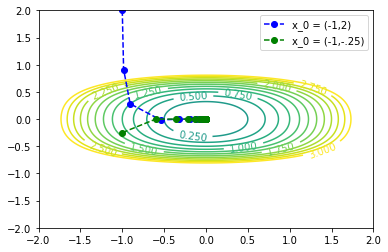

In [101]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-3, 3, 25)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.plot(x_pt3, y_pt3, '--bo')
plt.plot(x_pt4, y_pt4, '--go')
plt.legend(['x_0 = (-1,2)','x_0 = (-1,-.25)'])
plt.show()

### e) Error and convergence analysis of PR

In [102]:
x_star = np.array([0., 0.])
errors1 = []
for k, x_k in enumerate(zip(x_pt1, y_pt1)):
    err_k = err(x_k, x_star)
    errors1.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [-1.  2.] Error: 2.23606797749979
k = 1, x_k: [-0.984  0.912] Error: 1.3416407864998736
k = 2, x_k: [ 0.7789 -0.9226] Error: 1.2074038302897963
k = 3, x_k: [ 0.8632 -0.425 ] Error: 0.9621840767101234
k = 4, x_k: [ 0.4567 -0.2007] Error: 0.49881676605142256
k = 5, x_k: [ 0.3656 -0.0648] Error: 0.37128599584619393
k = 6, x_k: [-0.2829  0.0753] Error: 0.2927238427533958
k = 7, x_k: [-0.2829  0.0753] Error: 0.29272384276558944
k = 8, x_k: [-0.1697  0.0137] Error: 0.17027383375524902
k = 9, x_k: [0.0461 0.0262] Error: 0.05300340134759621
k = 10, x_k: [0.0441 0.0061] Error: 0.044514370407034695
k = 11, x_k: [-0.0429 -0.0065] Error: 0.04339297116077821
k = 12, x_k: [-0.0429 -0.0065] Error: 0.04339297116345299
k = 13, x_k: [-0.0257 -0.0013] Error: 0.02577780193470532
k = 14, x_k: [ 0.0057 -0.0022] Error: 0.006114475197312508
k = 15, x_k: [ 0.0052 -0.0005] Error: 0.005217265681251078
k = 16, x_k: [-0.0049  0.0005] Error: 0.004912554699005716
k = 17, x_k: [-0.0049  0.0005] Error: 0.0

In [103]:
errors2 = []
for k, x_k in enumerate(zip(x_pt2, y_pt2)):
    err_k = err(x_k, x_star)
    errors2.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [-1.   -0.25] Error: 1.0307764064044151
k = 1, x_k: [-0.6  0. ] Error: 0.6
k = 2, x_k: [ 0.2548 -0.2157] Error: 0.33388418903175576
k = 3, x_k: [ 0.3807 -0.0685] Error: 0.38685470637745684
k = 4, x_k: [ 0.2269 -0.0145] Error: 0.22735644579944964
k = 5, x_k: [-0.0486 -0.0191] Error: 0.052240186659630566
k = 6, x_k: [-0.0437 -0.004 ] Error: 0.04384001316197003
k = 7, x_k: [0.0407 0.0031] Error: 0.04077907796810207
k = 8, x_k: [0.0407 0.0031] Error: 0.040779077970359984
k = 9, x_k: [0.0244 0.0006] Error: 0.02440611421044683
k = 10, x_k: [-0.005   0.0011] Error: 0.005138769392809619
k = 11, x_k: [-0.0024 -0.0031] Error: 0.003917145497764694
k = 12, x_k: [-0.0006 -0.0019] Error: 0.0020148467568338385
k = 13, x_k: [-0.0008 -0.0007] Error: 0.0010109666195675109
k = 14, x_k: [-0.0004 -0.0004] Error: 0.0005819893279100002
k = 15, x_k: [-0.0003 -0.0001] Error: 0.0003653158567014643
k = 16, x_k: [0.0002 0.0002] Error: 0.0002868471094028877
k = 17, x_k: [0.0002 0.0002] Error: 0.0002868

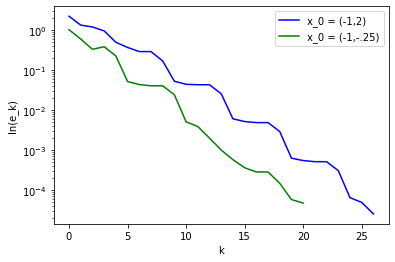

In [110]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(k1+1), errors1, 'b')
plt.plot(np.arange(k2+1), errors2, 'g')

ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.legend(['x_0 = (-1,2)','x_0 = (-1,-.25)'])
plt.show()

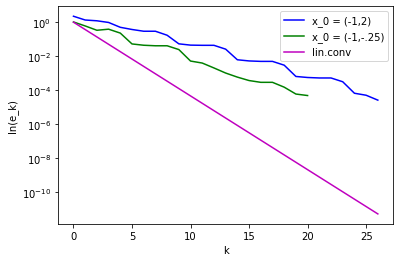

In [111]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(k1+1), errors1, 'b')
plt.plot(np.arange(k2+1), errors2, 'g')
plt.plot(np.arange(k1+1), np.exp(np.arange(k1+1, dtype=np.float32))**(-1), 'm')

ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.legend(['x_0 = (-1,2)','x_0 = (-1,-.25)', 'lin.conv'])
plt.show()

In [113]:
rates1 = []
x_k1 = list(zip(x_pt1, y_pt1))
for k in range(1,len(x_k1)-1):
    err_k_next = err(x_k1[k+1], x_star)
    err_k = err(x_k1[k], x_star)
    rate = err_k_next/(err_k**1)
    rates1.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 0.8999
k = 2, r: 0.7969
k = 3, r: 0.5184
k = 4, r: 0.7443
k = 5, r: 0.7884
k = 6, r: 1.0
k = 7, r: 0.5817
k = 8, r: 0.3113
k = 9, r: 0.8398
k = 10, r: 0.9748
k = 11, r: 1.0
k = 12, r: 0.5941
k = 13, r: 0.2372
k = 14, r: 0.8533
k = 15, r: 0.9416
k = 16, r: 1.0
k = 17, r: 0.5976
k = 18, r: 0.2165
k = 19, r: 0.8693
k = 20, r: 0.9379
k = 21, r: 1.0
k = 22, r: 0.5985
k = 23, r: 0.2106
k = 24, r: 0.7625
k = 25, r: 0.5147


In [114]:
rates2 = []
x_k2 = list(zip(x_pt2, y_pt2))
for k in range(1,len(x_k2)-1):
    err_k_next = err(x_k2[k+1], x_star)
    err_k = err(x_k2[k], x_star)
    rate = err_k_next/(err_k**1)
    rates2.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 0.5565
k = 2, r: 1.1586
k = 3, r: 0.5877
k = 4, r: 0.2298
k = 5, r: 0.8392
k = 6, r: 0.9302
k = 7, r: 1.0
k = 8, r: 0.5985
k = 9, r: 0.2106
k = 10, r: 0.7623
k = 11, r: 0.5144
k = 12, r: 0.5018
k = 13, r: 0.5757
k = 14, r: 0.6277
k = 15, r: 0.7852
k = 16, r: 1.0
k = 17, r: 0.5189
k = 18, r: 0.3935
k = 19, r: 0.817


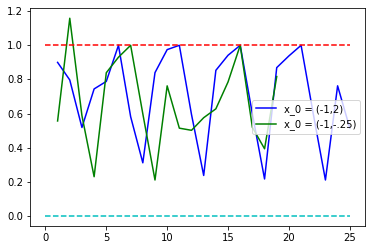

In [115]:
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(range(1,k1), rates1, 'b')
plt.plot(range(1,k2), rates2, 'g')
plt.plot(range(k1), k1*[0], 'c--')
plt.plot(range(k1), k1*[1], 'r--')
plt.legend(['x_0 = (-1,2)','x_0 = (-1,-.25)'])
plt.show()

## 4

### a) Code for BFGS

In [234]:
def f(x):
    return (x[0] - 3*x[1])**2 + x[0]**4

In [235]:
def gradf(x):
    df_dx = 2*(x[0] - 3*x[1]) + 4*(x[0]**3)
    df_dy = -6*(x[0] - 3*x[1])
    return np.array([df_dx, df_dy])

In [236]:
def hess_approx(B, s, y):
    C = (B@np.outer(s,s)@B)/(s@(B@s))
    D = (np.outer(y,y))/(y@s)
    return B - C + D

In [237]:
def line_search_bfgs(x, p, rho=.2, c_1=.1e-4, c_2=.9):
    alpha = 1
    while f(x + alpha*p) > f(x) + c_1*alpha*(p@gradf(x)) and\
    np.abs(p@gradf(x + alpha*p)) > c_2*np.abs(p@gradf(x)):
        alpha = rho*alpha
        if alpha < 1e-10:
            break
    return alpha   

In [255]:
def BFGS(x_0, tol=1e-10):
    x_k = x_0
    gradf_k = gradf(x_0)
    B_k = np.eye(2)
    
    x_pt = [x_0[0]]
    y_pt = [x_0[1]]
    
    k = 0
    first_iter = True
    
    while np.linalg.norm(gradf_k) >= tol:
        p_k = -np.linalg.inv(B_k)@gradf_k
        alpha_k = line_search_bfgs(x_k, p_k)
        
        x_k_next = x_k + alpha_k*p_k
        gradf_k_next = gradf(x_k_next)
        
        
        s_k = x_k_next - x_k
        y_k = gradf_k_next - gradf_k
        
        if first_iter:
            B_k = ((s_k@y_k)/(y_k@y_k))*B_k
            first_iter = False
            continue
        
        B_k_next = hess_approx(B_k, s_k, y_k)
        
        x_k, gradf_k, B_k = x_k_next, gradf_k_next, B_k_next
        
        f_k = f(x_k)
        x_pt.append(x_k[0])
        y_pt.append(x_k[1])
            
        k += 1
        
        print(f'Iteration: {k}, x_k: {x_k}, f(x_k): {f_k}')
    
    return x_k, x_pt, y_pt, k

### b) Numerical experiments for BFGS

In [256]:
x_0 = np.array([10, 10])
x_k, x_pt, y_pt, k = BFGS(x_0)

Iteration: 1, x_k: [3.89419925 9.81497573], f(x_k): 882.810488184979
Iteration: 2, x_k: [3.84141133 3.83395711], f(x_k): 276.43519931443115
Iteration: 3, x_k: [3.45618377 1.07456465], f(x_k): 142.74200349111584
Iteration: 4, x_k: [2.98043194 0.26902257], f(x_k): 83.6307488881402
Iteration: 5, x_k: [2.24142359 0.1800202 ], f(x_k): 28.135008211184978
Iteration: 6, x_k: [1.68868356 0.43910671], f(x_k): 8.26983078587976
Iteration: 7, x_k: [1.292327  0.4844561], f(x_k): 2.8151985920183593
Iteration: 8, x_k: [0.98852228 0.38985476], f(x_k): 0.9876497136554618
Iteration: 9, x_k: [0.74291498 0.26795271], f(x_k): 0.30833269294654114
Iteration: 10, x_k: [0.56265009 0.1848173 ], f(x_k): 0.10028702264227254
Iteration: 11, x_k: [0.42702843 0.13600926], f(x_k): 0.03361374265346583
Iteration: 12, x_k: [0.32215121 0.10449434], f(x_k): 0.010845717257613335
Iteration: 13, x_k: [0.24321138 0.08097781], f(x_k): 0.003499009771653693
Iteration: 14, x_k: [0.18400586 0.06196904], f(x_k): 0.0011499896132199522

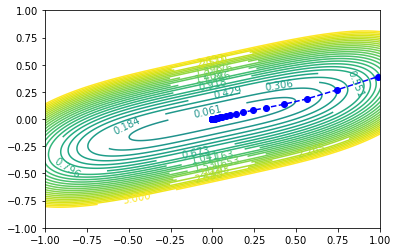

In [257]:
%matplotlib inline

delta = 0.01
bound = 2
x = np.arange(-bound, bound, delta)
y = np.arange(-bound, bound, delta)
levels = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = f((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.plot(x_pt, y_pt, '--bo')
plt.show()

### c) Convergence and error analysis for BFGS

In [258]:
x_star = np.array([0., 0.])
errors1 = []
for k, x_k in enumerate(zip(x_pt, y_pt)):
    err_k = err(x_k, x_star)
    errors1.append(err_k)
    print(f'k = {k},', f'x_k: {np.round(x_k, 4)}', f'Error: {err_k}')

k = 0, x_k: [10 10] Error: 14.142135623730951
k = 1, x_k: [3.8942 9.815 ] Error: 10.559286741211256
k = 2, x_k: [3.8414 3.834 ] Error: 5.427307636684888
k = 3, x_k: [3.4562 1.0746] Error: 3.619377767285692
k = 4, x_k: [2.9804 0.269 ] Error: 2.992548695430224
k = 5, x_k: [2.2414 0.18  ] Error: 2.248641141996693
k = 6, x_k: [1.6887 0.4391] Error: 1.7448400650383153
k = 7, x_k: [1.2923 0.4845] Error: 1.380147376734917
k = 8, x_k: [0.9885 0.3899] Error: 1.062620829421805
k = 9, x_k: [0.7429 0.268 ] Error: 0.7897602906128726
k = 10, x_k: [0.5627 0.1848] Error: 0.5922267855408847
k = 11, x_k: [0.427 0.136] Error: 0.4481649195605852
k = 12, x_k: [0.3222 0.1045] Error: 0.3386745809338735
k = 13, x_k: [0.2432 0.081 ] Error: 0.2563380199190623
k = 14, x_k: [0.184 0.062] Error: 0.19416055027541165
k = 15, x_k: [0.1389 0.0467] Error: 0.146568914880036
k = 16, x_k: [0.1048 0.035 ] Error: 0.11053984320209335
k = 17, x_k: [0.0792 0.0263] Error: 0.08347774565573467
k = 18, x_k: [0.0598 0.0199] Error: 

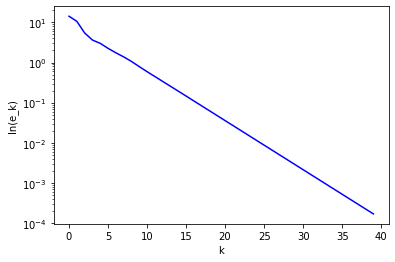

In [259]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(np.arange(k+1), errors1, 'b')


ax.set_xlabel('k')
ax.set_ylabel('ln(e_k)')
ax.set_yscale('log')
plt.show()

In [261]:
rates = []
x_k = list(zip(x_pt, y_pt))
for k in range(1,len(x_k)-1):
    err_k_next = err(x_k[k+1], x_star)
    err_k = err(x_k[k], x_star)
    rate = err_k_next/(err_k**1)
    rates.append(rate)
    print(f'k = {k},', f'r: {np.round(rate, 4)}')

k = 1, r: 0.514
k = 2, r: 0.6669
k = 3, r: 0.8268
k = 4, r: 0.7514
k = 5, r: 0.776
k = 6, r: 0.791
k = 7, r: 0.7699
k = 8, r: 0.7432
k = 9, r: 0.7499
k = 10, r: 0.7567
k = 11, r: 0.7557
k = 12, r: 0.7569
k = 13, r: 0.7574
k = 14, r: 0.7549
k = 15, r: 0.7542
k = 16, r: 0.7552
k = 17, r: 0.7551
k = 18, r: 0.7549
k = 19, r: 0.7551
k = 20, r: 0.7551
k = 21, r: 0.7548
k = 22, r: 0.7549
k = 23, r: 0.7549
k = 24, r: 0.7549
k = 25, r: 0.7549
k = 26, r: 0.7549
k = 27, r: 0.7549
k = 28, r: 0.7549
k = 29, r: 0.7549
k = 30, r: 0.7549
k = 31, r: 0.7549
k = 32, r: 0.7549
k = 33, r: 0.7549
k = 34, r: 0.7549
k = 35, r: 0.7549
k = 36, r: 0.7549
k = 37, r: 0.7549
k = 38, r: 0.7549


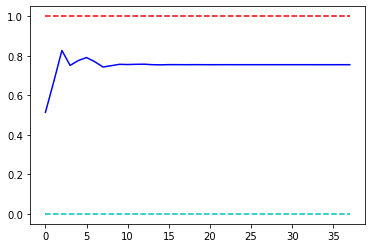

In [262]:
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(range(k), rates, 'b')
plt.plot(range(k), k*[0], 'c--')
plt.plot(range(k), k*[1], 'r--')
plt.show()